In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib nbagg

## I profil

In [3]:
Iprofil = np.array([[0.4, 1.3],
                   [0.4, 1.1],
                   [0.075, 1.1],
                   [0.075, 0.3],
                   [0.2, 0.3],
                   [0.2, 0]])
Iprofil_sym = Iprofil[::-1, :].copy()
Iprofil_sym[:, 0] *= -1
Iprofil = np.vstack((Iprofil, Iprofil_sym))
Iprofil = np.vstack((Iprofil, Iprofil[0, :]))
zT = 0.735
Iprofil[:, 1] -= zT

In [4]:
y = np.array([0, 0.065, 0.0775, 0, -0.0775, -0.065, 0])
z = np.array([0.37, 0, -0.114, -0.284, -0.114, 0, 0.37])

<IPython.core.display.Javascript object>


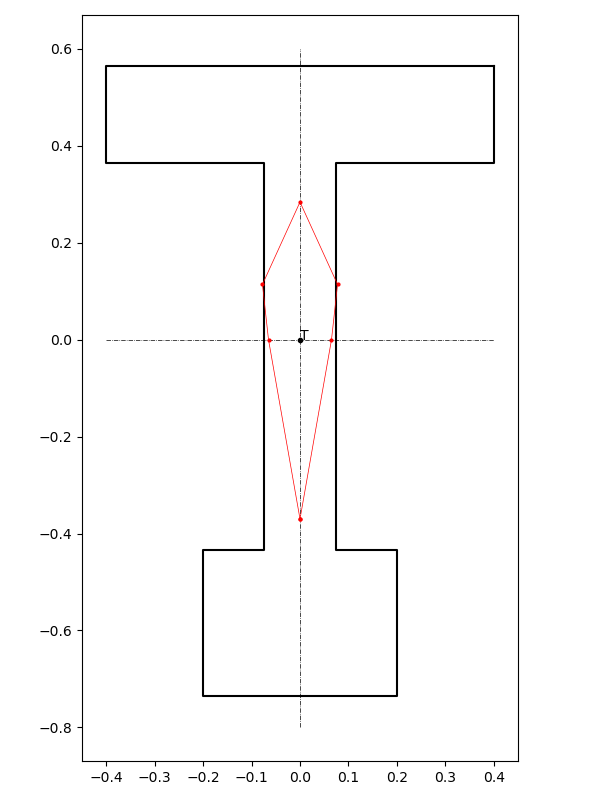

(-0.45, 0.45)

In [5]:
fig, ax = plt.subplots(figsize=(6,8), tight_layout=True)
ax.plot([0, 0], [-0.8, 0.6], 'k-.', lw=0.5)
ax.plot([-0.4, 0.4], [0, 0], 'k-.', lw=0.5)
ax.plot(Iprofil[:, 0], Iprofil[:, 1], 'k-', lw=1.5)
ax.plot(y, -z, 'r-o', lw=.5, ms=2)
ax.plot(0, 0, 'ko', ms=3)
ax.text(0, 0, 'T')
ax.set_aspect('equal')
ax.set_xlim(-0.45, 0.45)

In [6]:
def Irect(b, h):
    return 1. / 12. * (b * h**3)

def yznj(yi, zi, yk, zk):
    ynj = yi - (yk - yi) / (zk - zi) * zi
    znj = zi - (zk - zi) / (yk - yi) * yi
    return ynj, znj

## L-profil

In [7]:
Lprofil = np.array([[0, 0],
                    [0.15, 0],
                    [0.15, 0.05],
                    [0.05, 0.05],
                    [0.05, 0.15],
                    [0, 0.15],
                    [0, 0]])
A1 = 0.15 * 0.05
A2 = 0.05 * 0.1
A = A1 + A2
yT = (A1 * 0.15/2. + A2 * 0.05/2.) / A
zT = yT
Lprofil[:, 0] -= yT
Lprofil[:, 1] -= zT

Iy = Irect(0.15, 0.05) + A1 * (zT - 0.05/2.)**2 + Irect(0.05, 0.1) + A2 * (zT - 0.1)**2
Iz = Iy

iy2 = Iy / A
iz2 = iy2

yn2, zn2 = yznj(yT-0.05, zT-0.15, yT-0.15, zT-0.05)

y = np.array([0, -iz2/yn2, -iz2/(yT-0.15), 0, -iz2/yT, 0])
z = np.array([-iy2/(zT-0.15), -iy2/zn2, 0, -iy2/zT, 0, -iy2/(zT-0.15)])

print('A =', A)
print('yT =', yT)
print('zT =', zT)
print('Iy =', Iy)
print('iy2 =', iy2)
print('iz2 =', iz2)
print(y)
print(z)

A = 0.0125
yT = 0.05499999999999999
zT = 0.05499999999999999
Iy = 2.260416666666667e-05
iy2 = 0.0018083333333333335
iz2 = 0.0018083333333333335
[ 0.          0.02009259  0.01903509  0.         -0.03287879  0.        ]
[ 0.01903509  0.02009259  0.         -0.03287879  0.          0.01903509]


<IPython.core.display.Javascript object>


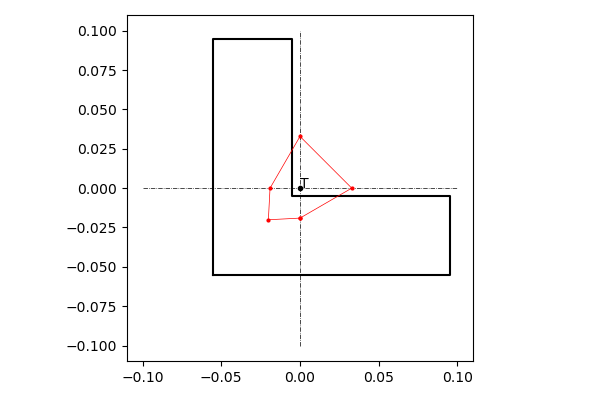

In [8]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True)
ax.plot([0, 0], [-0.1, 0.1], 'k-.', lw=0.5)
ax.plot([-0.1, 0.1], [0, 0], 'k-.', lw=0.5)
ax.plot(Lprofil[:, 0], Lprofil[:, 1], 'k-', lw=1.5)
ax.plot(-y, -z, 'r-o', lw=.5, ms=2)
ax.plot(0, 0, 'ko', ms=3)
ax.text(0, 0, 'T')

ax.set_aspect('equal')

## T-profil

In [9]:
profil = np.array([[0.15, 0],
                    [0.45, 0],
                    [0.45, 0.45],
                    [0.6, 0.45],
                    [0.6, 0.9],
                    [0, 0.9],
                    [0, 0.45],
                    [0.15, 0.45],
                    [0.15, 0]])
A1 = 0.3 * 0.45
A2 = 0.6 * 0.45
A = A1 + A2
zT = (A1 * 0.45/2. + A2 * (0.45 + 0.45/2.)) / A
yT = 0.3
profil[:, 0] -= yT
profil[:, 1] -= zT

Iy = Irect(0.3, 0.45) + A1 * (zT - 0.45/2.)**2 + Irect(0.6, 0.45) + A2 * (zT - (0.45 + 0.45/2.))**2
Iz = Irect(0.45, 0.6) + Irect(0.45, 0.3)

iy2 = Iy / A
iz2 = Iz / A

yn2, zn2 = yznj(-0.3, 0.075, -0.15, 0.525)
yn2_, zn2_ = yznj(0.3, 0.075, 0.15, 0.525)

y = np.array([0, -iz2/(-0.3), -iz2/yn2, 0, -iz2/(yn2_), -iz2/(0.3), 0])
z = np.array([-iy2/(-0.375), 0, -iy2/zn2, -iy2/0.525, -iy2/(zn2_), 0, -iy2/(-0.375)])

<IPython.core.display.Javascript object>


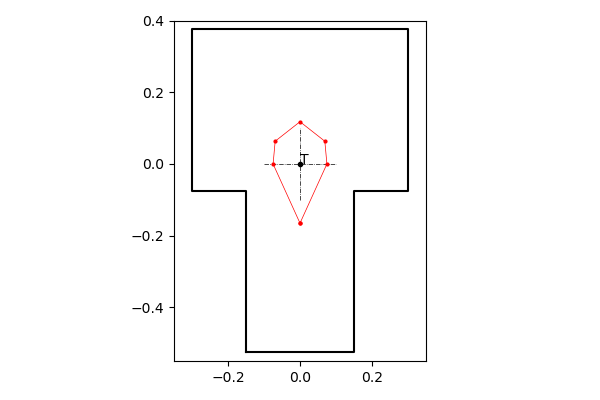

In [10]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True)
ax.plot([0, 0], [-0.1, 0.1], 'k-.', lw=0.5)
ax.plot([-0.1, 0.1], [0, 0], 'k-.', lw=0.5)
ax.plot(profil[:, 0], profil[:, 1], 'k-', lw=1.5)
ax.plot(-y, -z, 'r-o', lw=.5, ms=2)
ax.plot(0, 0, 'ko', ms=3)
ax.text(0, 0, 'T')
ax.set_xlim(-.35, .35)
ax.set_ylim(-.55, .4)

ax.set_aspect('equal')